In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("Customer_data.xlsx")
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(data.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [6]:
# Identify missing values in TotalCharges
missing_total_charges = data['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges: {missing_total_charges}")

# Calculate missing TotalCharges using MonthlyCharges * tenure
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'] * data['tenure'])


Missing values in TotalCharges: 11


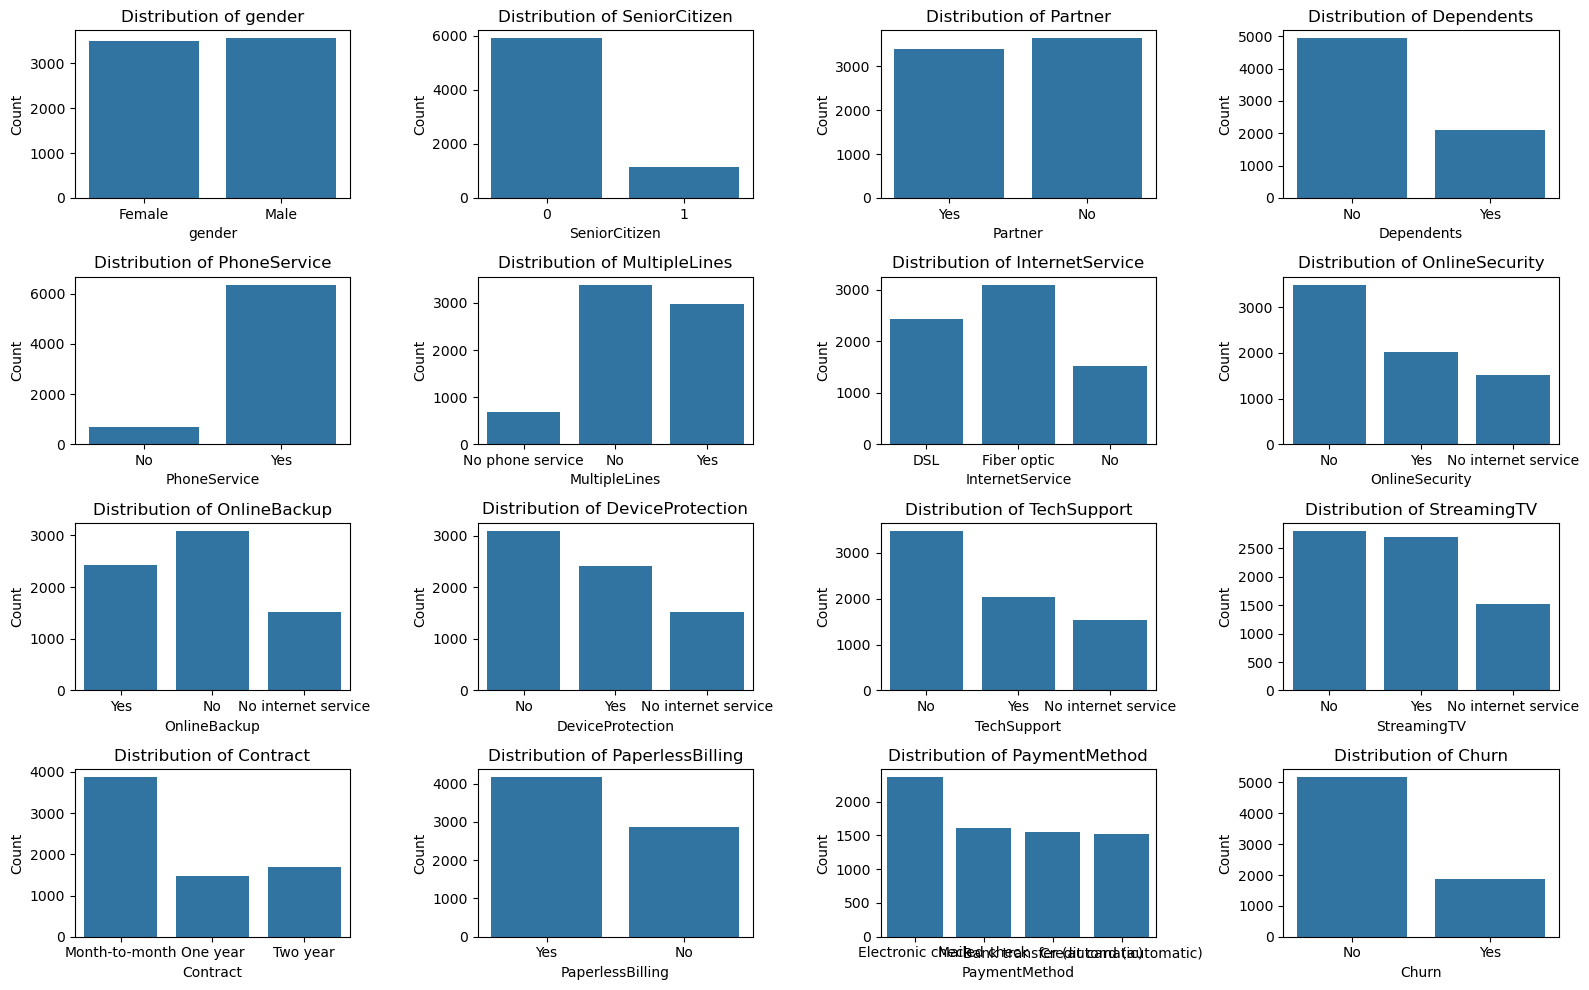

In [23]:
categorical_features = ['gender','SeniorCitizen', 'Partner', 'Dependents','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'Contract','PaperlessBilling','PaymentMethod', 'Churn']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


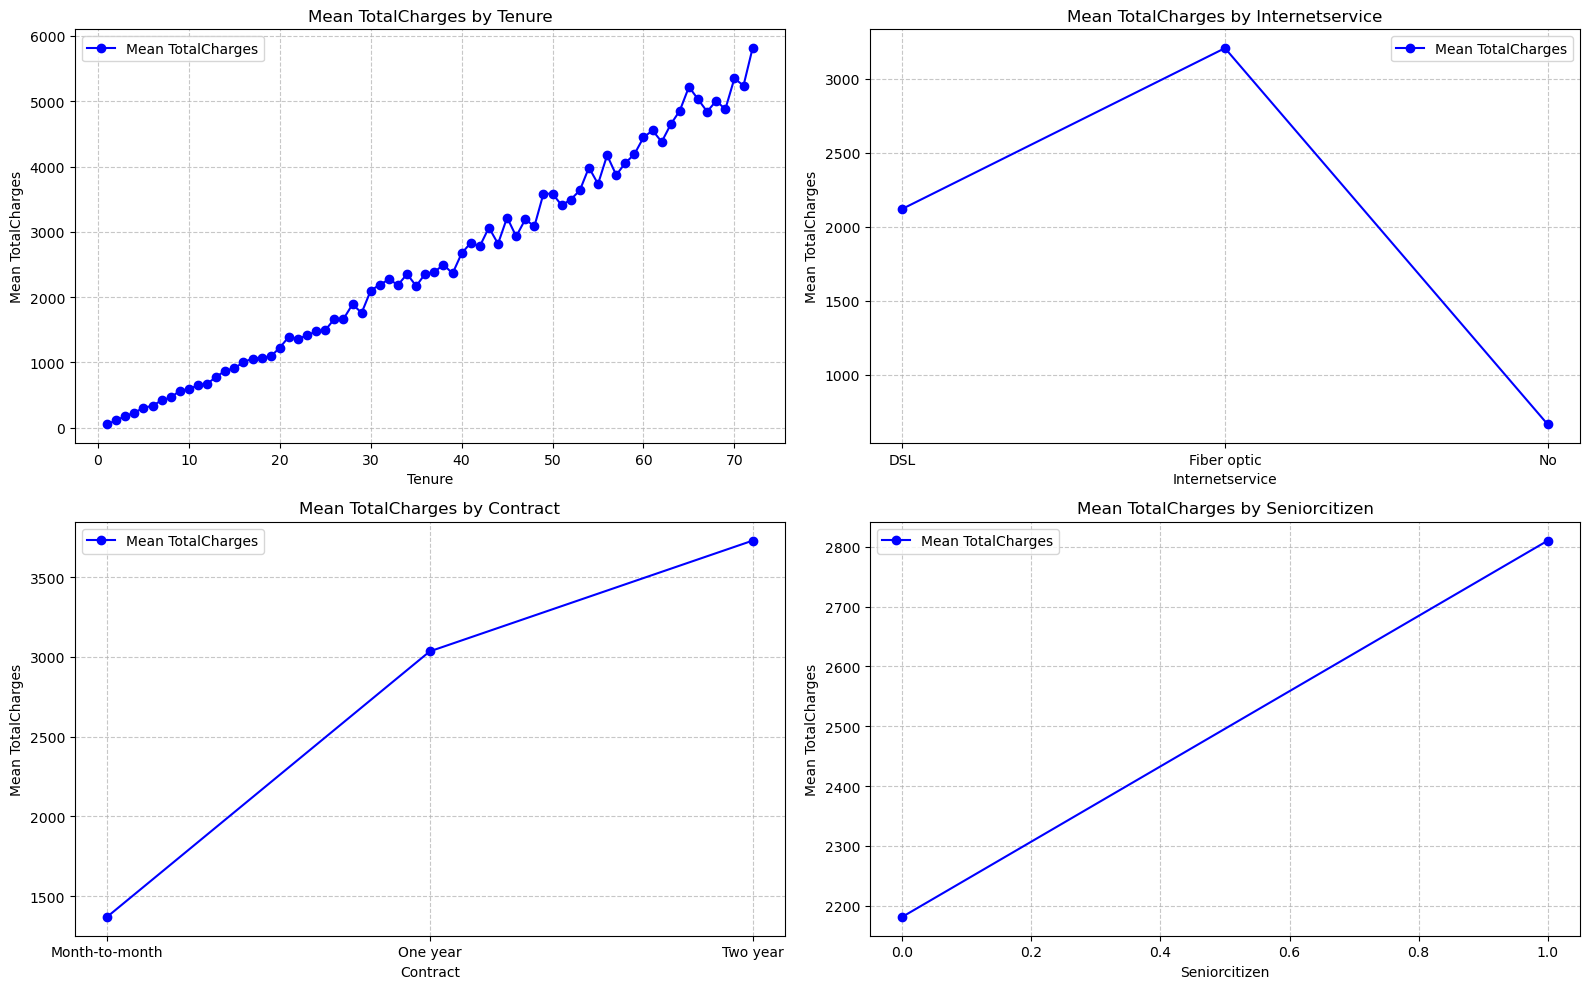

In [9]:
import pandas as pd

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
groupby_columns = ['tenure', 'InternetService', 'Contract', 'SeniorCitizen']

# Create a figure with subplots
plt.figure(figsize=(16, 10))

for i, column in enumerate(groupby_columns, 1):
    # Group by the column and calculate the mean of TotalCharges
    grouped_data = data.groupby(column)['TotalCharges'].mean().reset_index()

    plt.subplot(2, 2, i)
    plt.plot(grouped_data[column], grouped_data['TotalCharges'], marker='o', color='blue', label='Mean TotalCharges')
    plt.title(f'Mean TotalCharges by {column.capitalize()}', fontsize=12)
    plt.xlabel(column.capitalize(), fontsize=10)
    plt.ylabel('Mean TotalCharges', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.show()

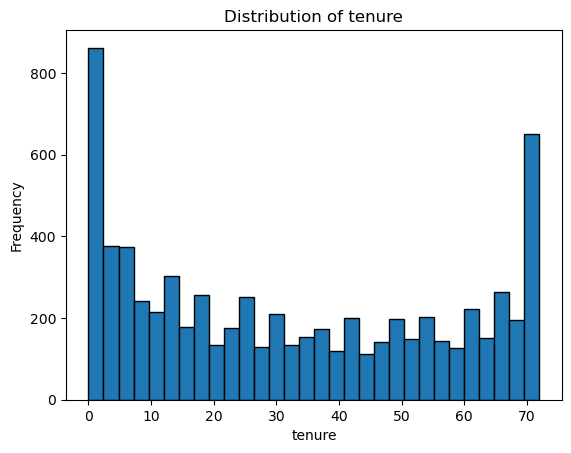

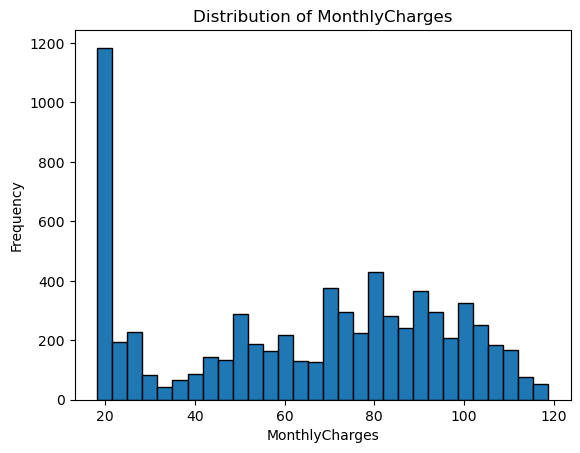

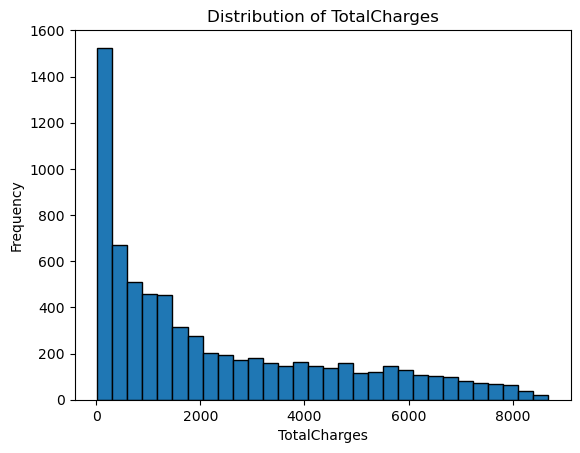

In [10]:
# Plot histograms of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.hist(data[feature], bins=30, edgecolor='k')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [11]:
# Convert binary categorical variables to 0/1
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# One-hot encode multi-category features
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [13]:
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# not runned 
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Load preprocessed training and testing data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').squeeze()  # Convert to Series
y_test = pd.read_csv('y_test.csv').squeeze()



In [30]:

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# Fit the model on the training data
rf_model.fit(X_train, y_train)
# Predict on the test data
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")


Accuracy: 0.79
Precision: 0.64
Recall: 0.47
F1 Score: 0.54
ROC-AUC Score: 0.83


In [31]:

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



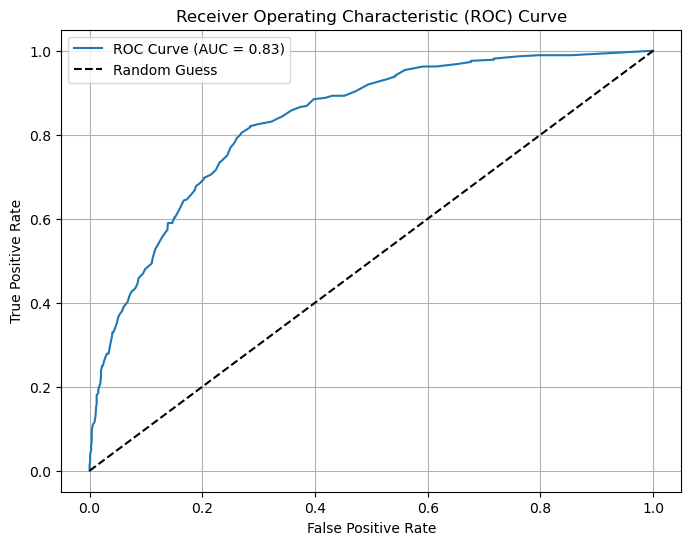

In [27]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()


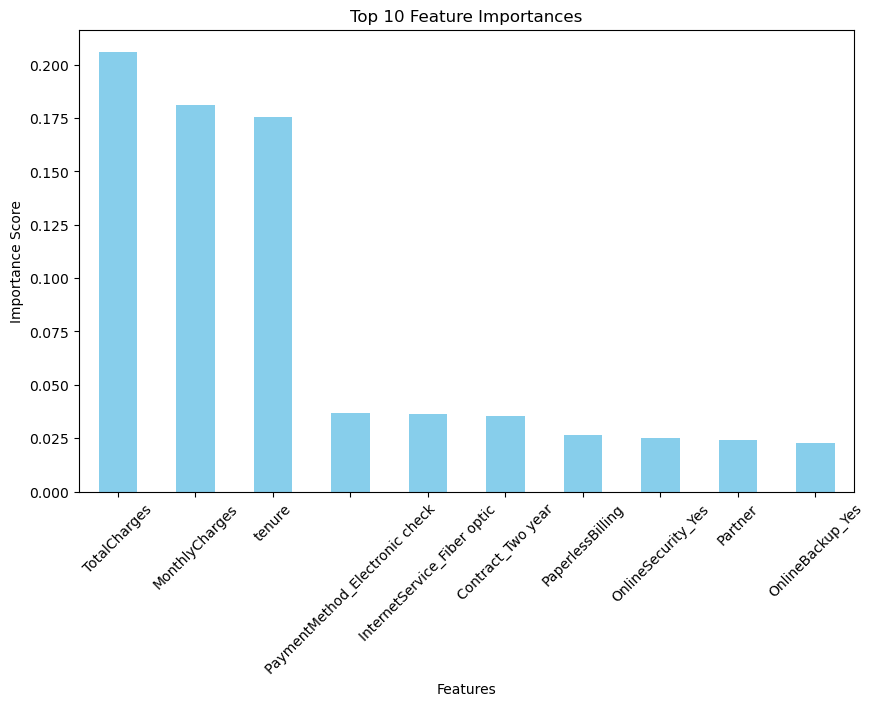

In [28]:
# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 10 important features
importances.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()


In [32]:
import joblib

# Save the model
joblib.dump(rf_model, 'customer_churn_model.pkl')


['customer_churn_model.pkl']

In [33]:
# Load the saved model
loaded_model = joblib.load('customer_churn_model.pkl')

# Example new data (replace with actual data)
new_data = X_test.sample(1)
new_prediction = loaded_model.predict(new_data)
new_prediction_proba = loaded_model.predict_proba(new_data)

print(f"Predicted Churn: {new_prediction[0]}")
print(f"Churn Probability: {new_prediction_proba[0][1]:.2f}")


Predicted Churn: 0
Churn Probability: 0.01
